## Introduction

In this tutorial we look at numerous examples of how `dicomsplit` works.

In [1]:
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.medical.imaging import *

from fmi.explore import *
from fmi.preprocessing import *
from fmi.pipeline import *

In [2]:
from nbdev.showdoc import *

`check_duplicate` is a handy `fmi` function that checks to see if there are any duplicate patients in the train and valid indexes.  It displays a histograph of the train/valid split both before and after `dicomsplit`

In [3]:
show_doc(check_duplicate)

<h4 id="check_duplicate" class="doc_header"><code>check_duplicate</code><a href="https://github.com/asvcode/fmi/tree/master/fmi/preprocessing.py#L135" class="source_link" style="float:right">[source]</a></h4>

> <code>check_duplicate</code>(**`items`**, **`valid_pct`**=*`0.2`*, **`seed`**=*`5`*)

Helper for dicomsplit to visualize duplicates

### SIIM_Small Dataset

In [4]:
pneumothorax_source = untar_data(URLs.SIIM_SMALL)
pneumo_items = get_dicom_files(pneumothorax_source)
pneumo_items

(#500) [Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000002.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000005.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000006.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000007.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000008.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000009.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000011.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000012.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000014.dcm'),Path('C:/Users/avird/.fastai/data/siim_small/sm/No Pneumothorax/000015.dcm')...]

Train: 400 
 Original Validation: 100 
 Updated Validation: 5


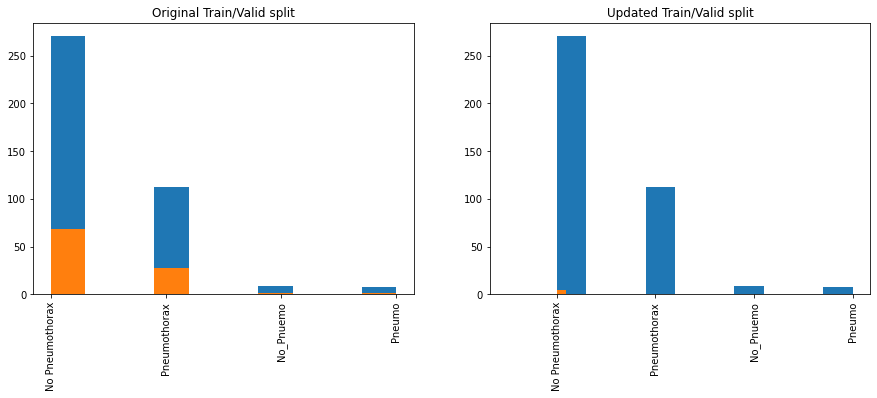

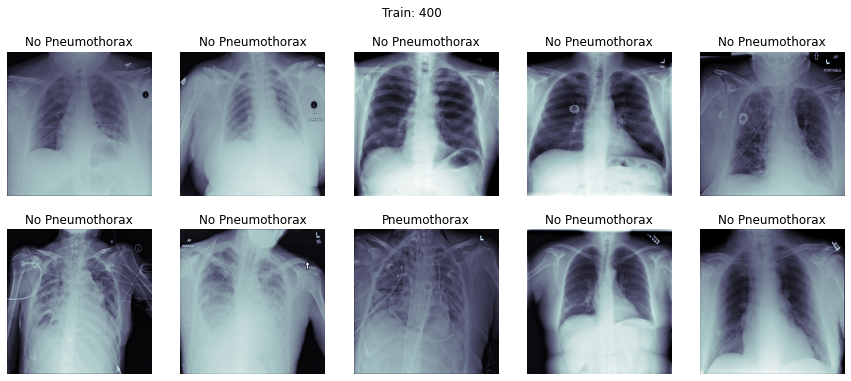

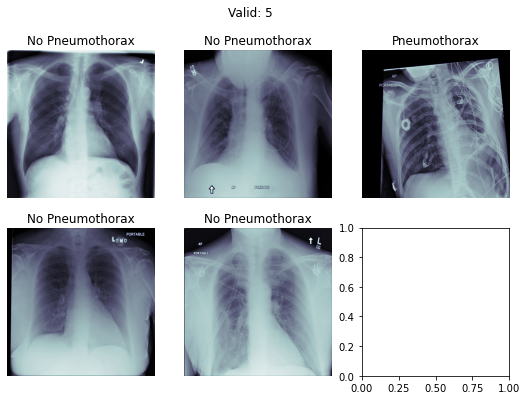

In [5]:
check_duplicate(pneumo_items, valid_pct=0.2, seed=7)

`fmi` has 2 handy functions that conveniently display image and patient identifiers

In [6]:
get_image_info(pneumo_items[0])

(0008, 0060) Modality                            CS: 'CR'
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0030) Pixel Spacing                       DS: [0.14300000000000002, 0.14300000000000002]
No SliceThickness
(0028, 0100) Bits Allocated                      US: 8
No Rescale Intercept
No Rescale Slope


In this case the modality of the dataset is Computed Radiography stored in MONOCHROME2 format(low values=dark, high values=bright), pixels are 8 bit meaning the pixel values will range from 0 to 255.  There is no SliceThickness, RescaleSlope and RescaleIntercept values

In [7]:
get_pii(pneumo_items[0])

(0010, 0010) Patient's Name                      PN: '850ddeb3-73ac-45e0-96bf-7d275bc83782'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's Age                       AS: '52'
No Image Comments


### OSIC Pulmonary Fibrosis Dataset

In [8]:
osic = 'D:/Datasets/osic-pulmonary-fibrosis-progression/train'
osic_items = get_dicom_files(osic)
osic_items

(#32684) [Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/1.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/10.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/11.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/12.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/13.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/14.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/15.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/16.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/17.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/18.dcm')...]

`fmi` has a convenient `random_` function that can be used to generate a random index.  We use this to create a smaller random dataset for convenience to show how `dicomsplitter` works.  in this case we generate a random list of `100`

In [9]:
rand_osic = random_(osic_items, value=100)
rand_osic

(#100) [Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00180637202240177410333/373.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00135637202224630271439/46.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/160.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00027637202179689871102/98.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00180637202240177410333/331.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00199637202248141386743/21.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00135637202224630271439/310.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00422637202311677017371/33.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00009637202177434476278/182.dcm'),Path('D:/Datasets/osic-pulmonary-fibrosis-progression/train/ID00381637202299644114027/48.dcm')...]

Train: 80 
 Original Validation: 20 
 Updated Validation: 11


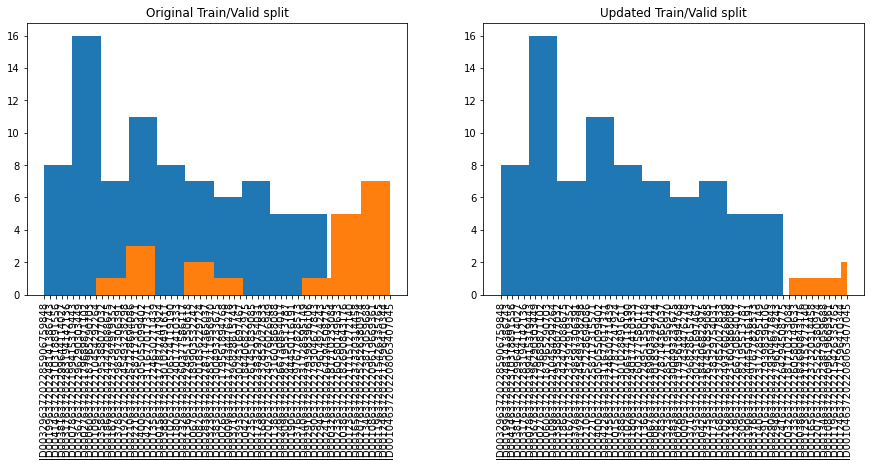

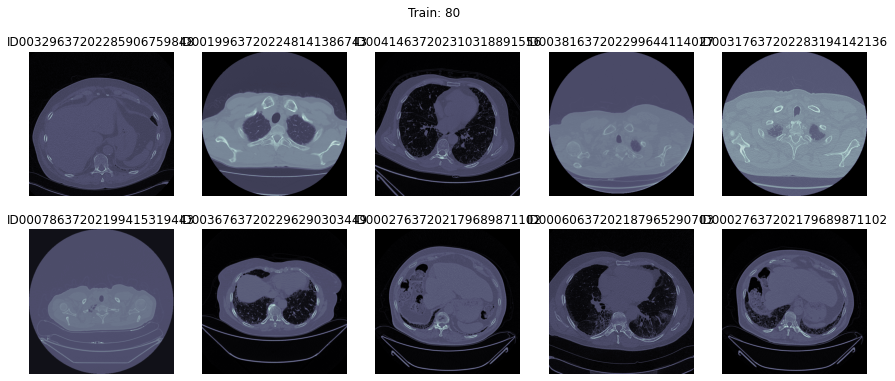

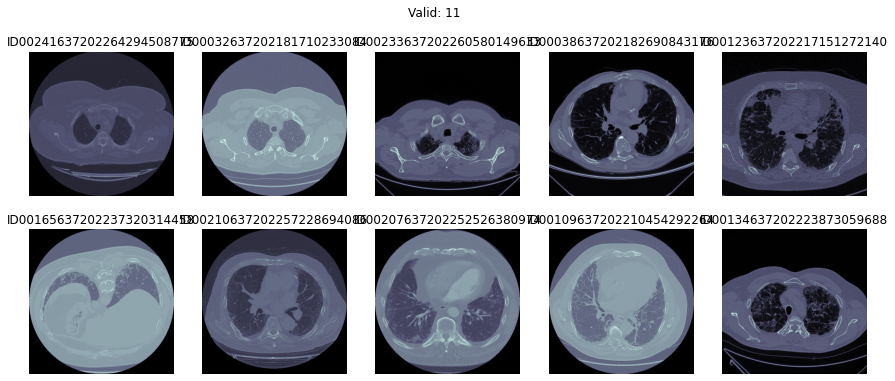

In [10]:
check_duplicate(rand_osic, valid_pct=0.2, seed=7)

In [11]:
get_image_info(rand_osic[0])

(0008, 0060) Modality                            CS: 'CT'
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0030) Pixel Spacing                       DS: [0.702, 0.702]
(0018, 0050) Slice Thickness                     DS: "0.5"
(0028, 0100) Bits Allocated                      US: 16
(0028, 1052) Rescale Intercept                   DS: "0.0"
(0028, 1053) Rescale Slope                       DS: "1.0"


This dataset is made of Computer tomography (CT) images stored in MONOCHROME2 format. CT scans predominantly use X-Rays to produce 3D images (these images are in 2D but are rendering together to produce a 3D representation).  This is why we now have a SliceThickness value.  The slices are stored as 16 bits and hence pixel values can range from -32,700 to +32700

In [12]:
get_pii(rand_osic[0])

(0010, 0010) Patient's Name                      PN: 'ID00180637202240177410333'
No Patient Birth Date
(0010, 0040) Patient's Sex                       CS: ''
No patient Age
No Image Comments


### RSNA Pneumonia Dataset

In [13]:
rsna = 'D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images'
rsna_items = get_dicom_files(rsna)
rand_rsna = random_(rsna_items, value=500)
rand_rsna

(#500) [Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/4ea1f70b-a38e-4b7c-871c-876eee03c1c6.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/9965a4c5-c59b-4fcd-a95b-3b2db9b0eb5e.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/6197bb45-7f5e-4579-beca-cbdbe1132d9a.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/d9a39790-2119-4411-a2b8-a447510d1304.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/329c254a-e6bc-44cf-bc09-365d5d43f4df.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/bcf4a382-f2ef-45bd-a3f3-7d733e767e98.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/5d1d1eb6-1c43-416e-b280-7aa689c4589a.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/stage_2_train_images/7f29e031-874c-4ea2-9f7f-edc056cb5e83.dcm'),Path('D:/Datasets/rsna-pneumonia-detection-challenge/sta

Train: 400 
 Original Validation: 100 
 Updated Validation: 99


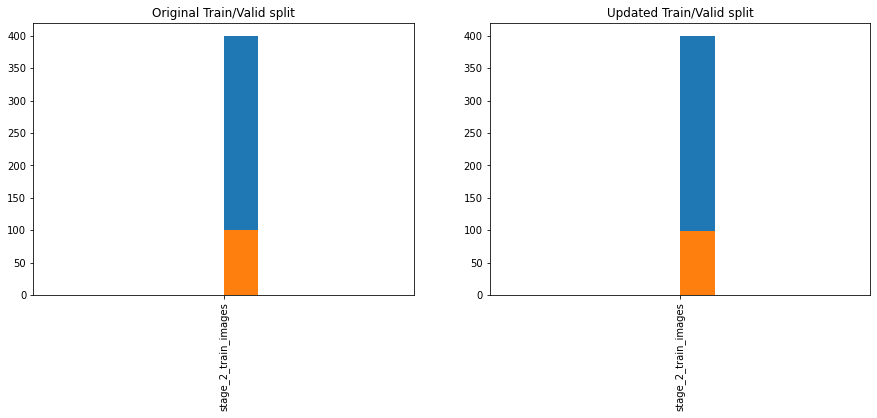

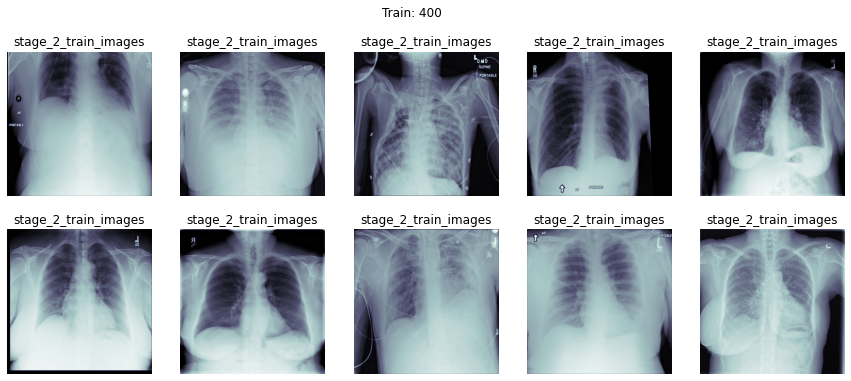

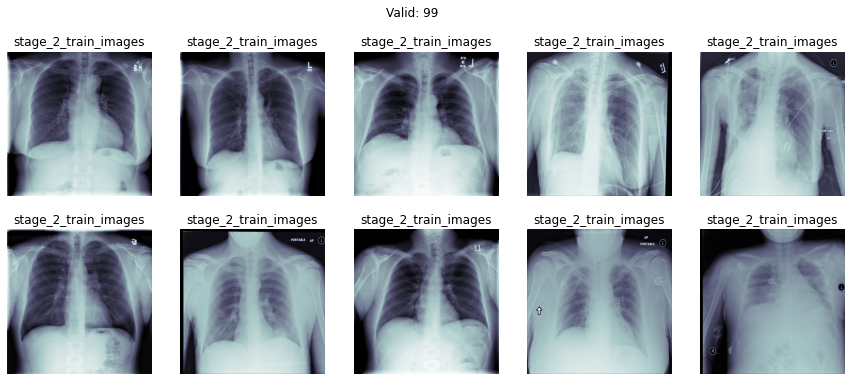

In [14]:
check_duplicate(rand_rsna, valid_pct=0.2, seed=7)

In [15]:
get_image_info(rand_rsna[0])

(0008, 0060) Modality                            CS: 'CR'
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0030) Pixel Spacing                       DS: [0.14300000000000002, 0.14300000000000002]
No SliceThickness
(0028, 0100) Bits Allocated                      US: 8
No Rescale Intercept
No Rescale Slope


In [16]:
get_pii(rand_rsna[0])

(0010, 0010) Patient's Name                      PN: '4ea1f70b-a38e-4b7c-871c-876eee03c1c6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age                       AS: '49'
No Image Comments


More to come